In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
ds = pd.read_csv(url, names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])
print(ds)

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### Summarising the Dataset

In [4]:
print(ds.shape)

(150, 5)


In [5]:
print(ds.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [6]:
print(ds.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
print(ds.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Data Visualisation

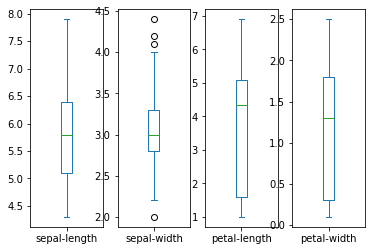

In [8]:
ds.plot(kind = 'box', subplots = True, sharex=False, sharey=False)
pyplot.show()

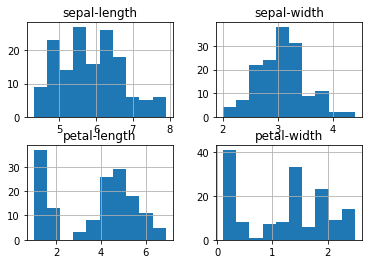

In [9]:
ds.hist()
pyplot.show()

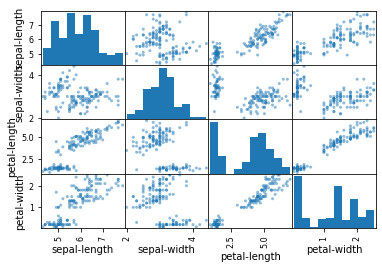

In [10]:

scatter_matrix(ds)
pyplot.show()

### Evaluating Algorithms

In [11]:
array = ds.to_numpy()
X = array[:, :4]
Y = array[:, 4:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [12]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was pas

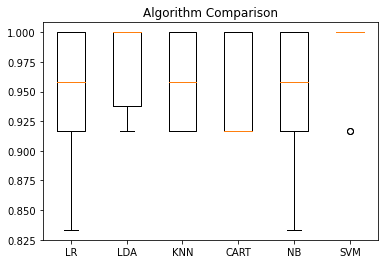

In [13]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [14]:
model = SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[.0001, .001, .01, 1, 10, 100, 1000, 10000], 
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
param_grid['gamma'] = np.logspace(-8, 3, 12)
grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=5)
grid.fit(X_train, Y_train)

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\henry\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000],
                         'gamma': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [16]:
results=pd.DataFrame.from_dict(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001400,0.000491,0.000800,0.000400,0.0001,0.0,linear,"{'C': 0.0001, 'gamma': 1e-08, 'kernel': 'linear'}",0.375,0.333333,0.375000,0.375000,0.375000,0.366667,0.016667,181
1,0.001994,0.000008,0.001008,0.000636,0.0001,0.0,poly,"{'C': 0.0001, 'gamma': 1e-08, 'kernel': 'poly'}",0.375,0.333333,0.375000,0.375000,0.375000,0.366667,0.016667,181
2,0.002000,0.000011,0.001003,0.000006,0.0001,0.0,rbf,"{'C': 0.0001, 'gamma': 1e-08, 'kernel': 'rbf'}",0.375,0.333333,0.375000,0.375000,0.375000,0.366667,0.016667,181
3,0.001592,0.000498,0.000808,0.000404,0.0001,0.0,sigmoid,"{'C': 0.0001, 'gamma': 1e-08, 'kernel': 'sigmo...",0.375,0.333333,0.375000,0.375000,0.375000,0.366667,0.016667,181
4,0.001396,0.000493,0.000200,0.000400,0.0001,0.0,linear,"{'C': 0.0001, 'gamma': 1e-07, 'kernel': 'linear'}",0.375,0.333333,0.375000,0.375000,0.375000,0.366667,0.016667,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.001399,0.000489,0.000401,0.000491,10000,100.0,sigmoid,"{'C': 10000, 'gamma': 100.0, 'kernel': 'sigmoid'}",0.375,0.333333,0.375000,0.375000,0.375000,0.366667,0.016667,181
380,0.001601,0.001357,0.000000,0.000000,10000,1000.0,linear,"{'C': 10000, 'gamma': 1000.0, 'kernel': 'linear'}",1.000,0.958333,1.000000,0.958333,0.833333,0.950000,0.061237,49
381,0.075618,0.073594,0.000802,0.000401,10000,1000.0,poly,"{'C': 10000, 'gamma': 1000.0, 'kernel': 'poly'}",0.875,0.958333,1.000000,0.958333,0.833333,0.925000,0.061237,97
382,0.002200,0.000401,0.000801,0.000748,10000,1000.0,rbf,"{'C': 10000, 'gamma': 1000.0, 'kernel': 'rbf'}",0.375,0.375000,0.416667,0.375000,0.416667,0.391667,0.020412,176


In [17]:
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

Best: 0.983333 using {'C': 1, 'gamma': 1e-08, 'kernel': 'linear'}


In [20]:
predictions = grid.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

